# Support Vector Machine Classification

Configure the project. Indeed you create a dataset in csv format.

In [1]:
! rm -rf *.xlsx
! unzip ./dataset/archive.zip
! mv *.xlsx data.xlsx


Archive:  ./dataset/archive.zip
  inflating: Student-Employability-Datasets.xlsx  


Import needed libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, jaccard_score
import scikitplot as skplt

%matplotlib inline

Read data from data.csv using pandas and store in data frame structure. Also shuffle data to have uniform distribution. 

In [3]:
df = pd.read_excel("data.xlsx")
df.head()
df = df.sample(frac=1.0, random_state=42).reset_index(drop=True)
df.head()

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,Student 2428,4,4,4,3,3,3,3,5,Employable
1,Student 1548,4,4,4,4,4,4,4,5,LessEmployable
2,Student 882,5,5,5,5,5,5,5,5,LessEmployable
3,Student 332,5,4,4,3,3,4,4,4,LessEmployable
4,Student 2244,4,4,4,4,5,4,4,5,LessEmployable


## Preprocessing

In [4]:
print(df.shape)
print(df.columns)
print(df.dtypes)

(2982, 10)
Index(['Name of Student', 'GENERAL APPEARANCE', 'MANNER OF SPEAKING',
       'PHYSICAL CONDITION', 'MENTAL ALERTNESS', 'SELF-CONFIDENCE',
       'ABILITY TO PRESENT IDEAS', 'COMMUNICATION SKILLS',
       'Student Performance Rating', 'CLASS'],
      dtype='object')
Name of Student               object
GENERAL APPEARANCE             int64
MANNER OF SPEAKING             int64
PHYSICAL CONDITION             int64
MENTAL ALERTNESS               int64
SELF-CONFIDENCE                int64
ABILITY TO PRESENT IDEAS       int64
COMMUNICATION SKILLS           int64
Student Performance Rating     int64
CLASS                         object
dtype: object


In [5]:
df['CLASS'].value_counts()

CLASS
Employable        1729
LessEmployable    1253
Name: count, dtype: int64

In [6]:
df = df.drop('Name of Student', axis=1)
categorical_attr = ['CLASS']

le = LabelEncoder()
df[categorical_attr] = df[categorical_attr].apply(le.fit_transform, axis=0)
df.head()

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,4,4,4,3,3,3,3,5,0
1,4,4,4,4,4,4,4,5,1
2,5,5,5,5,5,5,5,5,1
3,5,4,4,3,3,4,4,4,1
4,4,4,4,4,5,4,4,5,1


In [7]:
# summarize data
df.describe() 

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
count,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000
mean,4.246814,3.884641,3.972166,3.962777,3.910798,3.813883,3.525486,4.610664,0.420188
std,0.678501,0.757013,0.744135,0.781982,0.807602,0.739390,0.743881,0.692845,0.493672
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,0.000000
25%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,0.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,0.000000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


Print the histogram chart of data

In [8]:
print(df.columns)

Index(['GENERAL APPEARANCE', 'MANNER OF SPEAKING', 'PHYSICAL CONDITION',
       'MENTAL ALERTNESS', 'SELF-CONFIDENCE', 'ABILITY TO PRESENT IDEAS',
       'COMMUNICATION SKILLS', 'Student Performance Rating', 'CLASS'],
      dtype='object')


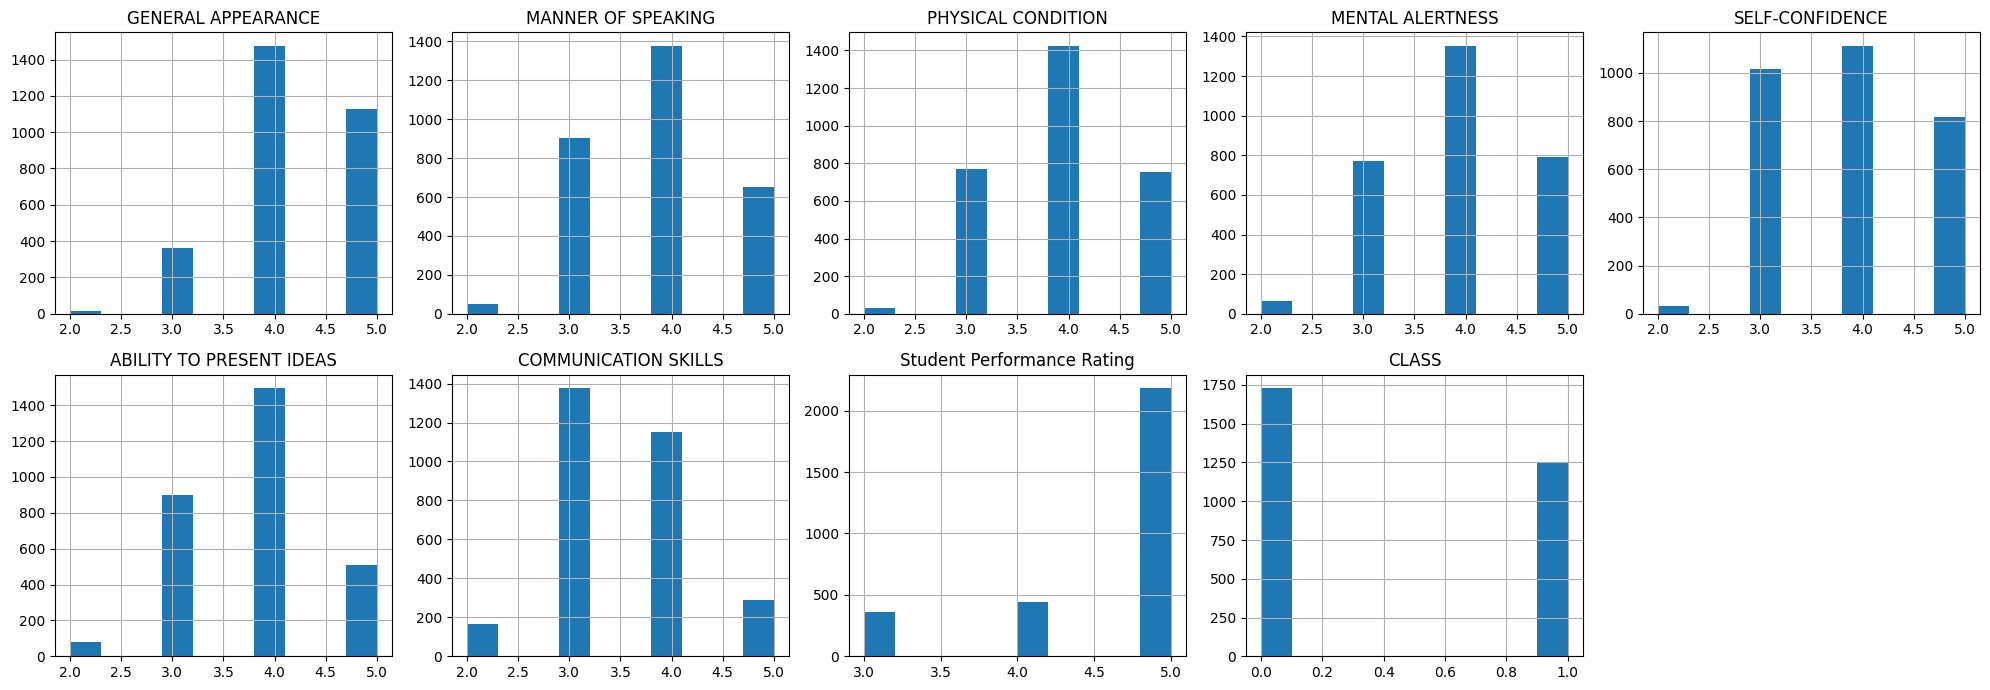

In [9]:
viz = df[['GENERAL APPEARANCE', 'MANNER OF SPEAKING', 'PHYSICAL CONDITION', 'MENTAL ALERTNESS', 'SELF-CONFIDENCE', 'ABILITY TO PRESENT IDEAS', 'COMMUNICATION SKILLS', 'Student Performance Rating', 'CLASS']]
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(20, 7))

axes = axes.flatten()

for i, column in enumerate(viz.columns):
    viz[column].hist(ax=axes[i])
    axes[i].set_title(column)


fig.delaxes(axes[9])
plt.tight_layout()
plt.show()

In [10]:
# print(df)
train, test = train_test_split(df, test_size=0.20, random_state=42)
# test, evaluate = train_test_split(test, test_size=0.5, random_state=42)

## Fit model based on data. 

In [11]:
train_x = np.asanyarray(train[['GENERAL APPEARANCE', 'MANNER OF SPEAKING', 'PHYSICAL CONDITION', 'MENTAL ALERTNESS', 'SELF-CONFIDENCE', 'ABILITY TO PRESENT IDEAS', 'COMMUNICATION SKILLS', 'Student Performance Rating']])
train_y = np.asanyarray(train[['CLASS']])

In [12]:
test_x = np.asanyarray(test[['GENERAL APPEARANCE', 'MANNER OF SPEAKING', 'PHYSICAL CONDITION', 'MENTAL ALERTNESS', 'SELF-CONFIDENCE', 'ABILITY TO PRESENT IDEAS', 'COMMUNICATION SKILLS', 'Student Performance Rating']])
test_y = np.asanyarray(test[['CLASS']])

In [13]:
model = svm.SVC(kernel="rbf")
model.fit(train_x, train_y)
test_y_ = model.predict(test_x)

/home/andre/code/AI/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Evaluation

In [14]:
print("The jaccard score for 0's:")
print(jaccard_score(test_y, test_y_, pos_label=0))
print("\nThe jaccard score for 1's:")
print(jaccard_score(test_y, test_y_, pos_label=1))

The jaccard score for 0's:
0.7702020202020202

The jaccard score for 1's:
0.6883561643835616


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       343
           1       0.84      0.79      0.82       254

    accuracy                           0.85       597
   macro avg       0.85      0.84      0.84       597
weighted avg       0.85      0.85      0.85       597

Logistic Regression Confusion Matrix:


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

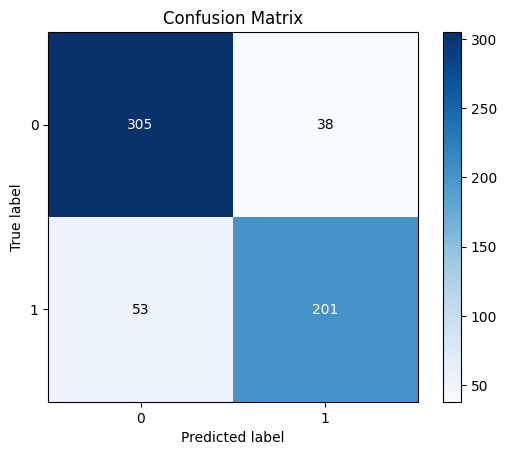

In [15]:
accuracy = accuracy_score(test_y, test_y_)
precision = precision_score(test_y, test_y_)
recall = recall_score(test_y, test_y_)



print("Logistic Regression Classification Report:")
print(classification_report(test_y, test_y_))

print("Logistic Regression Confusion Matrix:")
skplt.metrics.plot_confusion_matrix(test_y, test_y_)